[View in Colaboratory](https://colab.research.google.com/github/sabumjung/DL-with-TensorFlow/blob/DL-with-TensorFlow/3%EC%9E%A5_1_%EC%86%8C%ED%94%84%ED%8A%B8%EB%A7%A5%EC%8A%A4%EB%A5%BC_%EC%9D%B4%EC%9A%A9%ED%95%9C_MNIST_%EB%B6%84%EB%A5%98.ipynb)

In [0]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from random import randint
import numpy as np

In [9]:
logs_path = 'log_mnist_softmax'
batch_size = 100
learning_rate = 0.5
training_epochs = 10
mnist = input_data.read_data_sets("data", one_hot=True)

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


In [0]:
X = tf.placeholder(tf.float32, [None, 784], name="input")
Y_ = tf.placeholder(tf.float32, [None, 10])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
XX = tf.reshape(X, [-1, 784])

In [0]:
evidence=tf.matmul(XX, W) + b
Y = tf.nn.softmax(evidence, name="output")
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y_,\
                                                                          logits=Y))
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


In [0]:
train_step = tf.train.GradientDescentOptimizer(0.005).minimize(cross_entropy)
tf.summary.scalar("cost", cross_entropy)
tf.summary.scalar("accuracy", accuracy)
summary_op = tf.summary.merge_all()

In [7]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())

  for epoch in range(training_epochs):
    batch_count = int(mnist.train.num_examples/batch_size)
    for i in range(batch_count):
      batch_x, batch_y = mnist.train.next_batch(batch_size)
      _, summary = sess.run([train_step, summary_op],\
                            feed_dict={X: batch_x,\
                                       Y_: batch_y})
      writer.add_summary(summary, epoch * batch_count + i)
    print("Epoch: ", epoch)
    print("Accuracy: ", accuracy.eval(feed_dict={X: mnist.test.images, \
                                                 Y_: mnist.test.labels}))
    print("done")

    num = randint(0, mnist.test.images.shape[0])
    img = mnist.test.images[num]

    classification = sess.run(tf.argmax(Y, 1), feed_dict={X: [img]})
    print('Neural Network predicted', classification[0])
    print('Real label is:', np.argmax(mnist.test.labels[num]))

    saver = tf.train.Saver()
    save_path = saver.save(sess, "data/saved_mnist_cnn.ckpt")
    print("Model saved to %s" % save_path)

('Epoch: ', 0)
('Accuracy: ', 0.4524)
done
('Neural Network predicted', 0)
('Real label is:', 4)
Model saved to data/saved_mnist_cnn.ckpt
('Epoch: ', 1)
('Accuracy: ', 0.5557)
done
('Neural Network predicted', 1)
('Real label is:', 1)
Model saved to data/saved_mnist_cnn.ckpt
('Epoch: ', 2)
('Accuracy: ', 0.5664)
done
('Neural Network predicted', 7)
('Real label is:', 7)
Model saved to data/saved_mnist_cnn.ckpt
('Epoch: ', 3)
('Accuracy: ', 0.6169)
done
('Neural Network predicted', 7)
('Real label is:', 9)
Model saved to data/saved_mnist_cnn.ckpt
('Epoch: ', 4)
('Accuracy: ', 0.6658)
done
('Neural Network predicted', 4)
('Real label is:', 4)
Model saved to data/saved_mnist_cnn.ckpt
('Epoch: ', 5)
('Accuracy: ', 0.7058)
done
('Neural Network predicted', 7)
('Real label is:', 7)
Model saved to data/saved_mnist_cnn.ckpt
('Epoch: ', 6)
('Accuracy: ', 0.7362)
done
('Neural Network predicted', 2)
('Real label is:', 2)
Model saved to data/saved_mnist_cnn.ckpt
('Epoch: ', 7)
('Accuracy: ', 0.76

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Restoring parameters from data/saved_mnist_cnn.ckpt
[[9.9172324e-02 4.9020426e-04 2.7239950e-02 5.1930465e-02 1.0689931e-02
  5.8908976e-04 1.5019655e-02 1.0467080e-03 7.7547020e-01 1.8351441e-02]]
[8]


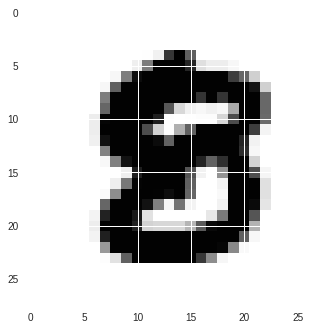

In [8]:
#소프트맥스 소스 로더
import matplotlib.pyplot as plt
import tensorflow as tf
from random import randint
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('data', one_hot=True)
sess = tf.InteractiveSession()
new_saver = tf.train.import_meta_graph('data/saved_mnist_cnn.ckpt.meta')
new_saver.restore(sess, 'data/saved_mnist_cnn.ckpt')
tf.get_default_graph().as_graph_def()

x = sess.graph.get_tensor_by_name("input:0")
y_conv = sess.graph.get_tensor_by_name("output:0")

num = randint(0, mnist.test.images.shape[0])
img = mnist.test.images[num]

result = sess.run(["input:0", y_conv], feed_dict= {x:[img]})
print(result[1])
print(sess.run(tf.argmax(result[1], 1)))

plt.imshow(img.reshape([28, 28]), cmap='Greys')
plt.show()